# Data collection

## 1. Fillup column "Global Data Centre IP Traffic" with datata

   Year  Predicted Global Data Centre IP Traffic
0  2000                                 0.126437
1  2001                                 0.160562
2  2002                                 0.203897
3  2003                                 0.258927
4  2004                                 0.328811
5  2005                                 0.417556
6  2006                                 0.530252
7  2007                                 0.673365
8  2008                                 0.855103
9  2009                                 1.085892


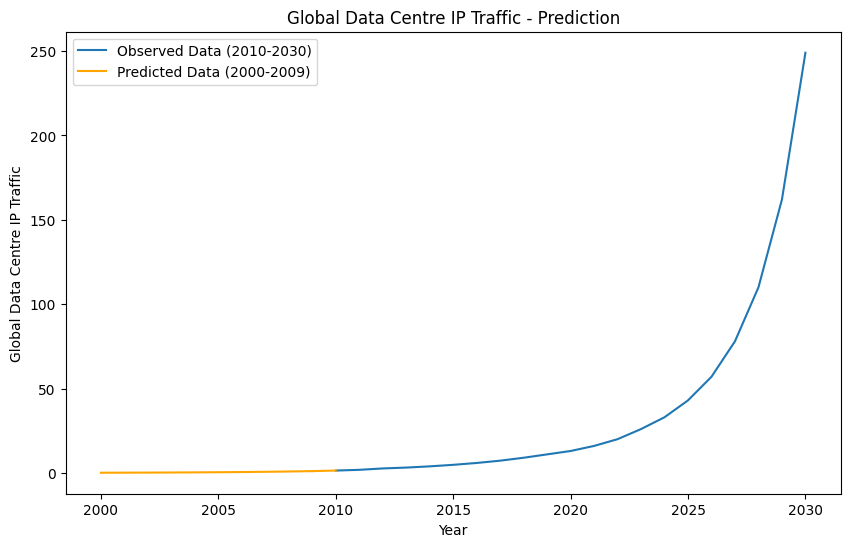

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2010, 2031),
    "Global Data Centre IP Traffic": [1.403, 1.843, 2.662, 3.174, 3.905, 4.803, 5.907, 7.266, 9, 11, 13, 16, 20, 26, 33, 43, 57, 78, 110, 162, 249]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Train a linear regression model
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Global Data Centre IP Traffic'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_scaled, y_scaled)

# Predict for the years 2000 to 2009
years_to_predict = np.arange(2000, 2010).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = model.predict(years_to_predict_scaled)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Global Data Centre IP Traffic": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Global Data Centre IP Traffic'], label='Observed Data (2010-2030)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Global Data Centre IP Traffic'].iloc[-1], df['Global Data Centre IP Traffic'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Global Data Centre IP Traffic'], label='Predicted Data (2000-2009)', color='orange')
plt.title('Global Data Centre IP Traffic - Prediction')
plt.xlabel('Year')
plt.ylabel('Global Data Centre IP Traffic')
plt.legend()
plt.show()


## Future Prediction

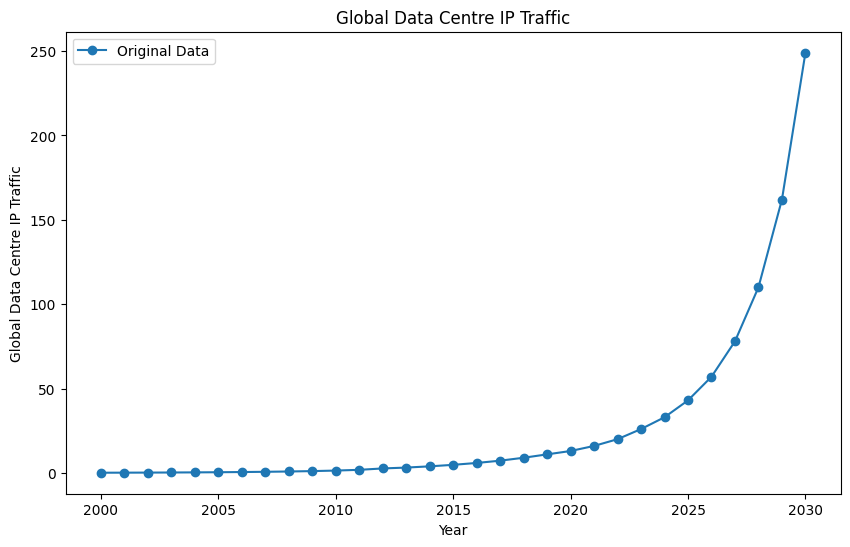

Mean Squared Error for each model:
Linear Regression: 1383.1272747833793
Ridge Regression: 1382.5201385950209
Lasso Regression: 1380.3361968048694
SVR: 2427.2474430254

Best model: Lasso Regression


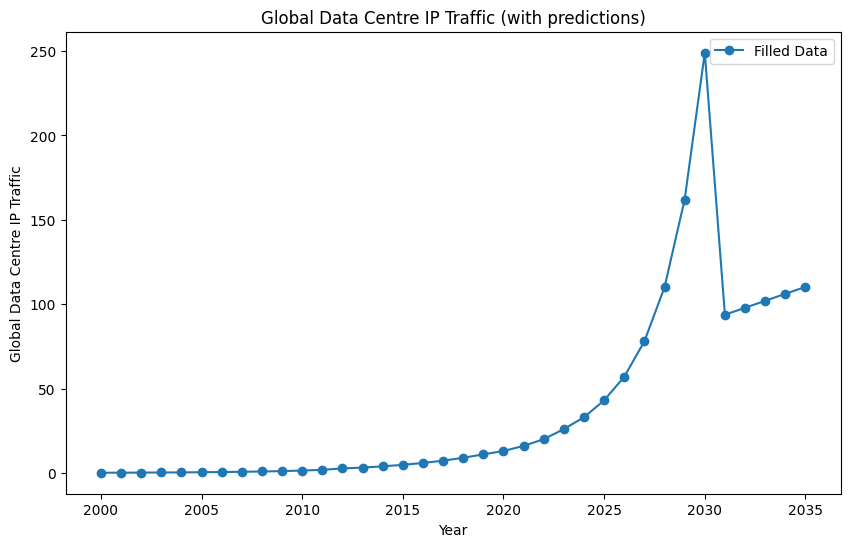


Filled DataFrame:
    Year  Global Data Centre IP Traffic
0   2000                       0.126437
1   2001                       0.160562
2   2002                       0.203897
3   2003                       0.258927
4   2004                       0.328811
5   2005                       0.417556
6   2006                       0.530252
7   2007                       0.673365
8   2008                       0.855103
9   2009                       1.085892
10  2010                       1.403000
11  2011                       1.843000
12  2012                       2.662000
13  2013                       3.174000
14  2014                       3.905000
15  2015                       4.803000
16  2016                       5.907000
17  2017                       7.266000
18  2018                       9.000000
19  2019                      11.000000
20  2020                      13.000000
21  2021                      16.000000
22  2022                      20.000000
23  2023             

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Global Data Centre IP Traffic": [0.126437, 0.160562, 0.203897, 0.258927, 0.328811, 0.417556, 0.530252, 0.673365, 
                                      0.855103, 1.085892, 1.403, 1.843, 2.662, 3.174, 3.905, 4.803, 5.907, 7.266, 
                                      9, 11, 13, 16, 20, 26, 33, 43, 57, 78, 110, 162, 249, np.nan, np.nan, np.nan, np.nan, np.nan]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Global Data Centre IP Traffic'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Global Data Centre IP Traffic')
plt.title('Global Data Centre IP Traffic')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Global Data Centre IP Traffic']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Global Data Centre IP Traffic'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Global Data Centre IP Traffic'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Global Data Centre IP Traffic')
plt.title('Global Data Centre IP Traffic (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 2. Fillup column "Servers shipped/produced globally per year (In Millions)" with data

   Year  Predicted Servers shipped
0  2000                   5.863487
1  2001                   6.092991
2  2002                   6.331478
3  2003                   6.579300
4  2004                   6.836821


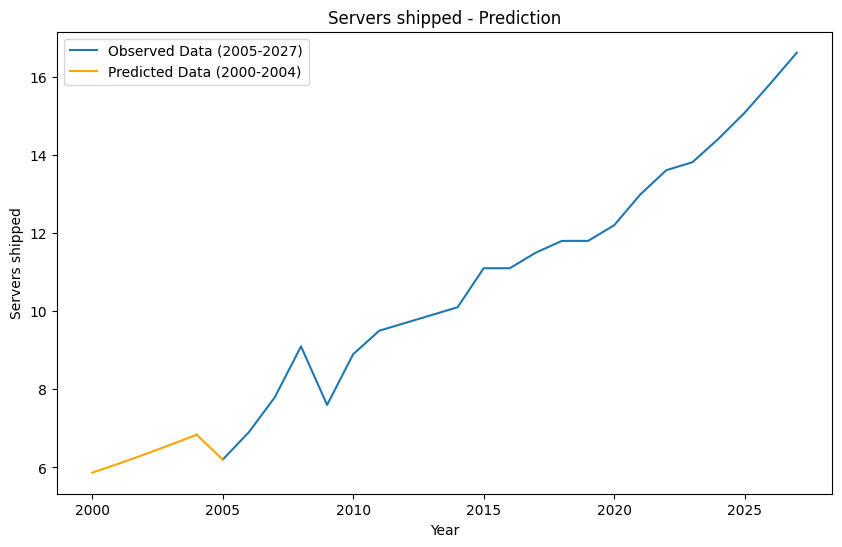

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2005, 2028),
    "Servers shipped": [6.2, 6.9, 7.8, 9.1, 7.6, 8.9, 9.5, 9.7, 9.9, 10.1, 11.1, 11.1, 11.5, 11.8, 11.8, 12.2, 12.987, 13.611, 13.814, 14.416, 15.08, 15.84, 16.619]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Train a linear regression model
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Servers shipped'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_scaled, y_scaled)

# Predict for the years 2000 to 2004
years_to_predict = np.arange(2000, 2005).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = model.predict(years_to_predict_scaled)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Servers shipped": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(df['Year'], df['Servers shipped'], label='Observed Data (2005-2027)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Servers shipped'].iloc[-1], df['Servers shipped'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Servers shipped'], label='Predicted Data (2000-2004)', color='orange')

plt.title('Servers shipped - Prediction')
plt.xlabel('Year')
plt.ylabel('Servers shipped')
plt.legend()
plt.show()


## Future prediction

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   28
Model:                     AutoReg(8)   Log Likelihood                 -10.757
Method:               Conditional MLE   S.D. of innovations              0.414
Date:                Fri, 26 Jul 2024   AIC                             41.513
Time:                        10:54:59   BIC                             51.471
Sample:                             8   HQIC                            43.457
                                   28                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5815      0.546      1.066      0.287      -0.488       1.651
y.L1           0.2224      0.243      0.914      0.361      -0.255       0.700
y.L2           0.1634      0.228      0.716      0.4

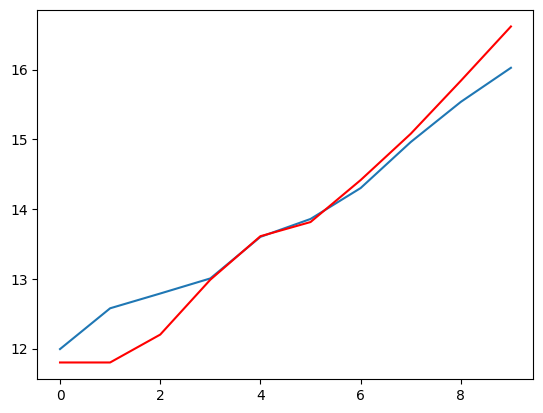

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2000, 2028),
    "Servers shipped": [5.863487, 6.092991, 6.331478, 6.5793, 6.836821, 6.2, 6.9, 7.8, 9.1, 7.6, 8.9, 9.5, 9.7, 9.9, 10.1, 11.1, 11.1, 11.5, 11.8, 11.8, 12.2, 12.987, 13.611, 13.814, 14.416, 15.08, 15.84, 16.619]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Year", inplace=True)
X=df.values

from statsmodels.tsa.ar_model import AutoReg

train = X[:len(X)-10]
test = X[len(X)-10:]

model = AutoReg(X,lags=8).fit()

print(model.summary())

pred = model.predict(start=len(train),end=len(X)-1,dynamic=False)

from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color= 'red')
print(pred)

In [2]:
pred_future = model.predict(start=len(X), end=len(X)+7, dynamic=False)
print("The future prediction for the next 10 years")
print(pred_future)
print('Number of predictions made: \t', len(pred_future))

The future prediction for the next 10 years
[16.74062257 17.39284582 17.99296806 18.70777916 19.19004529 19.80427993
 20.5294902  21.14264292]
Number of predictions made: 	 8


# 3. Fillup column "Installed & active servers per year (Millions)" with data)

   Year  Predicted Installed & active servers
0  2000                             24.923973
1  2001                             25.885307
2  2002                             26.883721
3  2003                             27.920645
4  2004                             28.997563


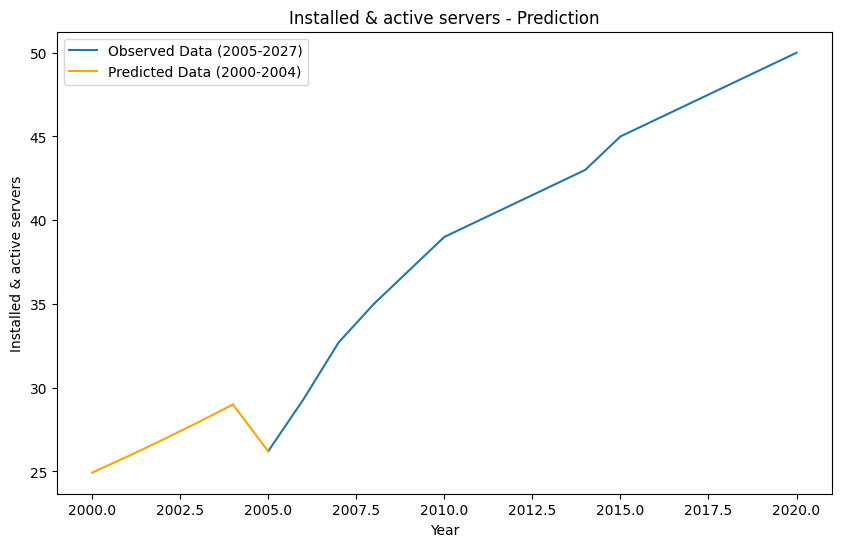

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2005, 2021),
    "Installed & active servers": [26.2, 29.3, 32.7, 35, 37, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Train a linear regression model
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Installed & active servers'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_scaled, y_scaled)

# Predict for the years 2000 to 2004
years_to_predict = np.arange(2000, 2005).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = model.predict(years_to_predict_scaled)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Installed & active servers": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(df['Year'], df['Installed & active servers'], label='Observed Data (2005-2027)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Installed & active servers'].iloc[-1], df['Installed & active servers'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Installed & active servers'], label='Predicted Data (2000-2004)', color='orange')

plt.title('Installed & active servers - Prediction')
plt.xlabel('Year')
plt.ylabel('Installed & active servers')
plt.legend()
plt.show()


## Future prediction

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   21
Model:                     AutoReg(8)   Log Likelihood                   4.756
Method:               Conditional MLE   S.D. of innovations              0.168
Date:                Fri, 26 Jul 2024   AIC                             10.488
Time:                        10:55:33   BIC                             16.137
Sample:                             8   HQIC                             9.327
                                   21                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0994      2.330      5.621      0.000       8.532      17.667
y.L1           0.1864      0.226      0.823      0.410      -0.257       0.630
y.L2          -0.0373      0.225     -0.166      0.8

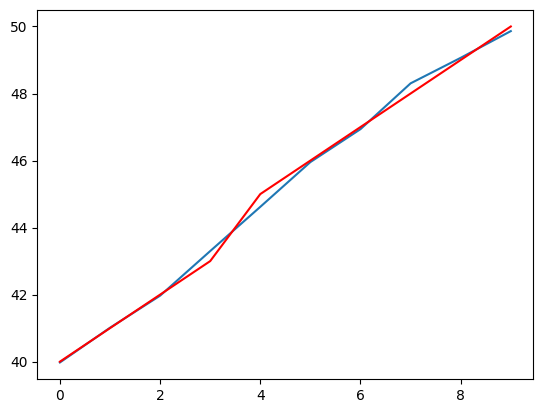

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2000, 2021),
    "Installed & active servers": [24.923973, 25.885307, 26.883721, 27.920645, 28.997563, 26.2, 29.3, 32.7, 35, 37, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Year", inplace=True)
X=df.values

from statsmodels.tsa.ar_model import AutoReg

train = X[:len(X)-10]
test = X[len(X)-10:]

model = AutoReg(X,lags=8).fit()

print(model.summary())

pred = model.predict(start=len(train),end=len(X)-1,dynamic=False)

from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color= 'red')
print(pred)

In [4]:
pred_future = model.predict(start=len(X), end=len(X)+14, dynamic=False)
print("The future prediction for the next 10 years")
print(pred_future)
print('Number of predictions made: \t', len(pred_future))

The future prediction for the next 10 years
[50.75447888 51.58291494 52.51243517 53.21082343 53.90403968 54.64585375
 55.27491155 55.87819303 56.48143729 57.03459423 57.5710304  58.07865467
 58.55391583 59.01681562 59.44978801]
Number of predictions made: 	 15


# 4. "Zettabits (Computations)"

    Year  Predicted Computations
0   2000                0.540284
1   2001                0.708017
2   2002                0.927822
3   2003                1.215866
4   2004                1.593334
5   2005                2.087987
6   2006                2.736206
7   2007                3.585667
8   2008                4.698844
9   2009                6.157608
10  2010                8.069249
11  2011               10.574362
12  2012               13.857192
13  2013               18.159183
14  2014               23.796735
15  2015               31.184475
16  2016               40.865752
17  2017               53.552600


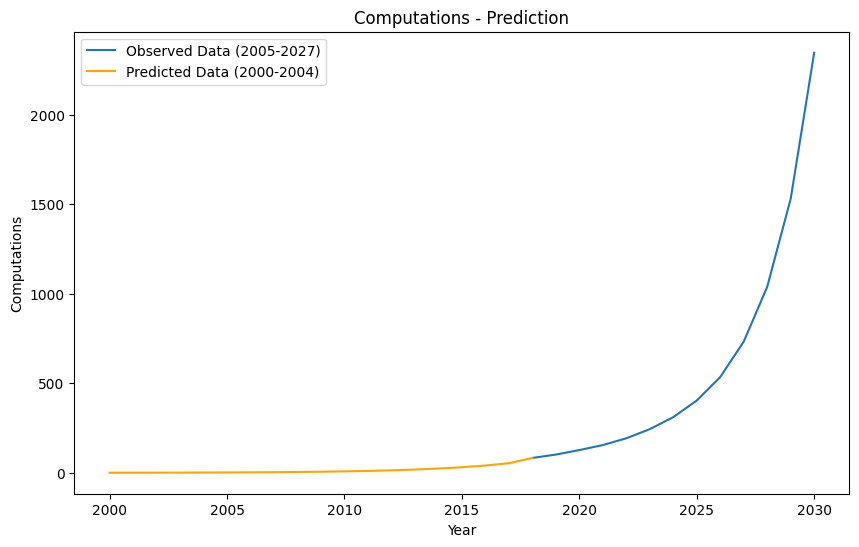

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2018, 2031),
    "Computations": [83, 102, 127, 155, 193, 244, 311, 404, 535, 733, 1039, 1531, 2347]
}

df = pd.DataFrame(data)

# Reverse the data for backcasting
df_reversed = df[::-1].reset_index(drop=True)

# Train a linear regression model
X = df_reversed['Year'].values.reshape(-1, 1)
y = np.log(df_reversed['Computations'].values.reshape(-1, 1))

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_scaled, y_scaled)

# Predict for the years 2000 to 2017
years_to_predict = np.arange(2000, 2018).reshape(-1, 1)
years_to_predict_scaled = scaler_X.transform(years_to_predict)
predictions_scaled = model.predict(years_to_predict_scaled)
predictions_log = scaler_y.inverse_transform(predictions_scaled)
predictions = np.exp(predictions_log)

# Print the predicted values
predicted_values = pd.DataFrame({
    "Year": years_to_predict.flatten(),
    "Predicted Computations": predictions.flatten()
})
print(predicted_values)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(df['Year'], df['Computations'], label='Observed Data (2005-2027)')
plt.plot([predicted_values['Year'].iloc[-1], df['Year'].iloc[0]], [predicted_values['Predicted Computations'].iloc[-1], df['Computations'].iloc[0]], color='orange')
plt.plot(predicted_values['Year'], predicted_values['Predicted Computations'], label='Predicted Data (2000-2004)', color='orange')

plt.title('Computations - Prediction')
plt.xlabel('Year')
plt.ylabel('Computations')
plt.legend()
plt.show()


## Future prediction

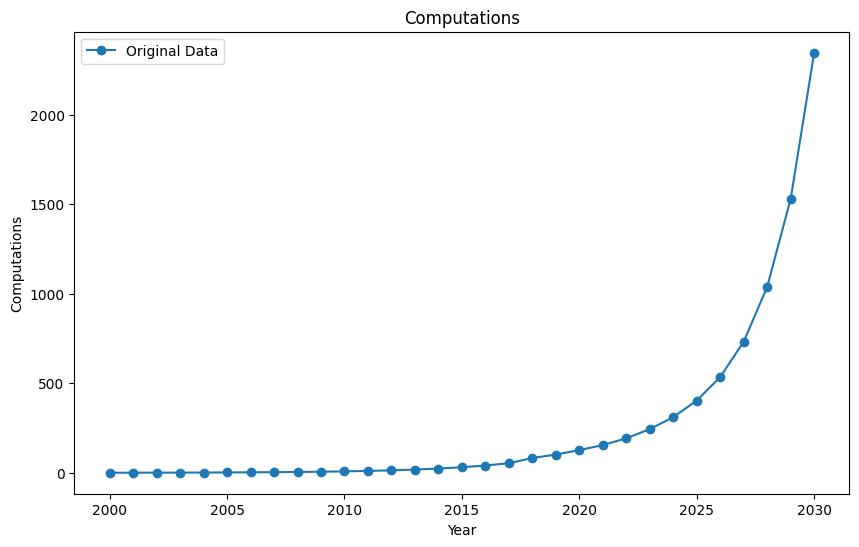

Mean Squared Error for each model:
Linear Regression: 122410.9824343321
Ridge Regression: 122357.99270720923
Lasso Regression: 122385.05992102883
SVR: 248778.6804906882

Best model: Ridge Regression


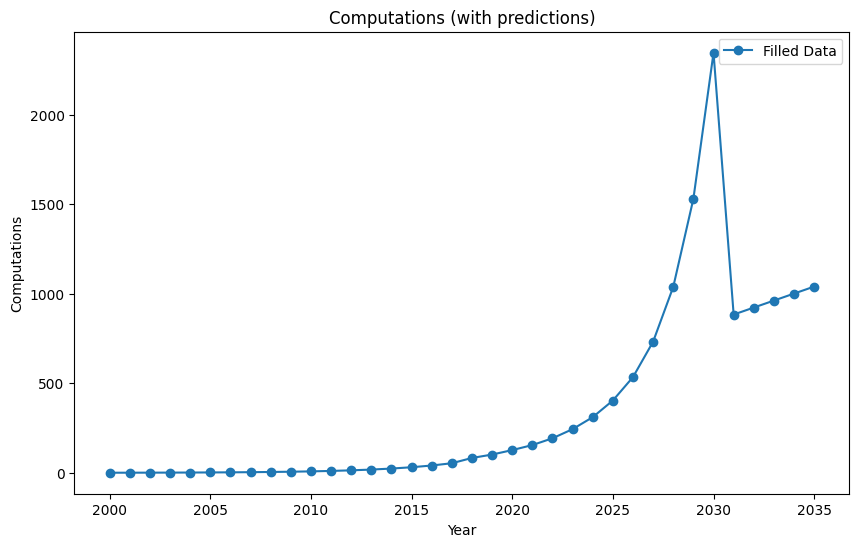


Filled DataFrame:
    Year  Computations
0   2000      0.540284
1   2001      0.708017
2   2002      0.927822
3   2003      1.215866
4   2004      1.593334
5   2005      2.087987
6   2006      2.736206
7   2007      3.585667
8   2008      4.698844
9   2009      6.157608
10  2010      8.069249
11  2011     10.574362
12  2012     13.857192
13  2013     18.159183
14  2014     23.796735
15  2015     31.184475
16  2016     40.865752
17  2017     53.552600
18  2018     83.000000
19  2019    102.000000
20  2020    127.000000
21  2021    155.000000
22  2022    193.000000
23  2023    244.000000
24  2024    311.000000
25  2025    404.000000
26  2026    535.000000
27  2027    733.000000
28  2028   1039.000000
29  2029   1531.000000
30  2030   2347.000000
31  2031    884.199331
32  2032    923.275678
33  2033    962.352025
34  2034   1001.428372
35  2035   1040.504719


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Computations": [0.540284, 0.708017, 0.927822, 1.215866, 1.593334, 2.087987, 2.736206, 3.585667, 4.698844,
                     6.157608, 8.069249, 10.574362, 13.857192, 18.159183, 23.796735, 31.184475, 40.865752, 
                     53.5526, 83, 102, 127, 155, 193, 244, 311, 404, 535, 733, 1039, 1531, 2347, np.nan, np.nan, np.nan, np.nan, np.nan]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Computations'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Computations')
plt.title('Computations')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Computations']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Computations'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Computations'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Computations')
plt.title('Computations (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 5. Predict "Data Center Electricity use (TWh)" with 2 other independent column

### fillup the missing data points:

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Data preprocessing
data = {
    "Year": np.arange(2000, 2036),
    "Computations": [0.540284, 0.708017, 0.927822, 1.215866, 1.593334, 2.087987, 2.736206, 3.585667, 4.698844, 6.157608, 8.069249, 10.574362, 13.857192, 18.159183, 23.796735, 31.184475, 40.865752, 53.5526, 83, 102, 127, 155, 193, 244, 311, 404, 535, 733, 1039, 1531, 2347, 3874.031867, 4314.725454, 4475.317213, 4387.414896, 4219.827914],
    "Global Data Centre IP Traffic": [0.126437, 0.160562, 0.203897, 0.258927, 0.328811, 0.417556, 0.530252, 0.673365, 0.855103, 1.085892, 1.403, 1.843, 2.662, 3.174, 3.905, 4.803, 5.907, 7.266, 9, 11, 13, 16, 20, 26, 33, 43, 57, 78, 110, 162, 249, 661.022414, 1139.346568, 2018.585523, 3639.721455, 6655.39064],
    "Data Center Electricity use (TWh)": [np.nan, np.nan, 152, np.nan, np.nan, np.nan, np.nan, 180, 254, np.nan, np.nan, 237, 268, np.nan, np.nan, 220, np.nan, np.nan, 211, 208, 207, 202, 239, 287, 347, 429, 540, 702, 946, 1324, 1929, np.nan, np.nan, np.nan, np.nan, np.nan]
}

df = pd.DataFrame(data)
df.dropna(inplace=True)  # Drop rows with NaN values for this example

X = df[["Computations", "Global Data Centre IP Traffic"]]
y = df["Data Center Electricity use (TWh)"]

# Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    results[name] = mse

results


C:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.082e+04, tolerance: 3.913e+02
  model = cd_fast.enet_coordinate_descent(


{'Linear Regression': 1134.9480326669288,
 'Ridge Regression': 1176.8104648542878,
 'Lasso Regression': 2214.5849729898996,
 'SVR': 248703.76926645372}

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data provided
data = {
    "Year": np.arange(2000, 2031),
    "Global Electricity": [13261, 13393, 13839, 14384, 15027, 15681, 16327, 17133, 17443, 17353, 18753, 19444, 19924, 20578, 20987, 21405, 22028, 22722, 23536, 23921, 23966, 25343, 25530, 29035, 30158, 31375, 32693, 34150, 35767, 37571, 39594],
    "Computations": [0.540284, 0.708017, 0.927822, 1.215866, 1.593334, 2.087987, 2.736206, 3.585667, 4.698844, 6.157608, 8.069249, 10.574362, 13.857192, 18.159183, 23.796735, 31.184475, 40.865752, 53.5526, 83, 102, 127, 155, 193, 244, 311, 404, 535, 733, 1039, 1531, 2347],
    "Global Data Centre IP Traffic": [0.126437, 0.160562, 0.203897, 0.258927, 0.328811, 0.417556, 0.530252, 0.673365, 0.855103, 1.085892, 1.403, 1.843, 2.662, 3.174, 3.905, 4.803, 5.907, 7.266, 9, 11, 13, 16, 20, 26, 33, 43, 57, 78, 110, 162, 249],
    "Data Center Electricity use (TWh)": [np.nan, np.nan, 152, np.nan, np.nan, np.nan, np.nan, 180, 254, np.nan, np.nan, 237, 268, np.nan, np.nan, 220, np.nan, np.nan, 211, 208, 207, 202, 239, 287, 347, 429, 540, 702, 946, 1324, 1929]
}


# Create DataFrame
df = pd.DataFrame(data)

# Prepare the feature matrix X and target vector y
X = df[["Global Electricity", "Computations", "Global Data Centre IP Traffic"]]
y = df["Data Center Electricity use (TWh)"]

# Handle missing values in y by dropping those rows
df = df.dropna(subset=["Data Center Electricity use (TWh)"])
X = df[["Global Electricity", "Computations", "Global Data Centre IP Traffic"]]
y = df["Data Center Electricity use (TWh)"]

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regressor
model = LinearRegression()
model.fit(X, y)

# Predict on the test set
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Predict missing values
df_full = pd.DataFrame(data)
nan_emission_df = df_full[df_full["Data Center Electricity use (TWh)"].isna()]

X_nan = nan_emission_df[["Global Electricity", "Computations", "Global Data Centre IP Traffic"]]
y_nan_pred = model.predict(X_nan)

print("Predicted missing values:", y_nan_pred)

# Update DataFrame with predictions
df_full.loc[df_full["Data Center Electricity use (TWh)"].isna(), "Data Center Electricity use (TWh)"] = y_nan_pred
print(df_full)


Mean Squared Error: 813.9188027267923
R^2 Score: 0.9960479551273679
Predicted missing values: [186.45511049 186.99092406 185.5615847  184.73343614 184.34787412
 184.59887804 194.55737942 196.69709276 239.84395917 250.7613004
 271.63573931 279.52345729]
    Year  Global Electricity  Computations  Global Data Centre IP Traffic  \
0   2000               13261      0.540284                       0.126437   
1   2001               13393      0.708017                       0.160562   
2   2002               13839      0.927822                       0.203897   
3   2003               14384      1.215866                       0.258927   
4   2004               15027      1.593334                       0.328811   
5   2005               15681      2.087987                       0.417556   
6   2006               16327      2.736206                       0.530252   
7   2007               17133      3.585667                       0.673365   
8   2008               17443      4.698844            

### Future value prediction

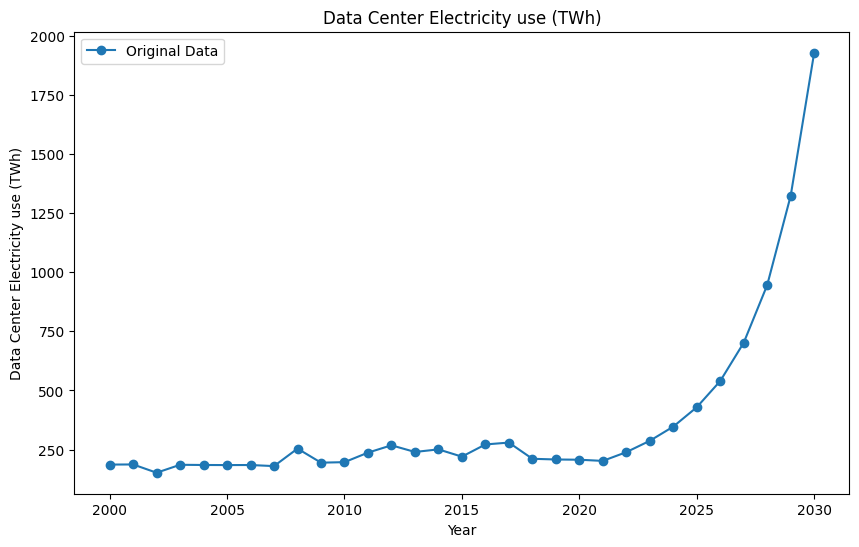

Mean Squared Error for each model:
Linear Regression: 88742.7174489726
Ridge Regression: 88707.90925030039
Lasso Regression: 88718.78666588287
SVR: 121223.13736573533

Best model: Ridge Regression


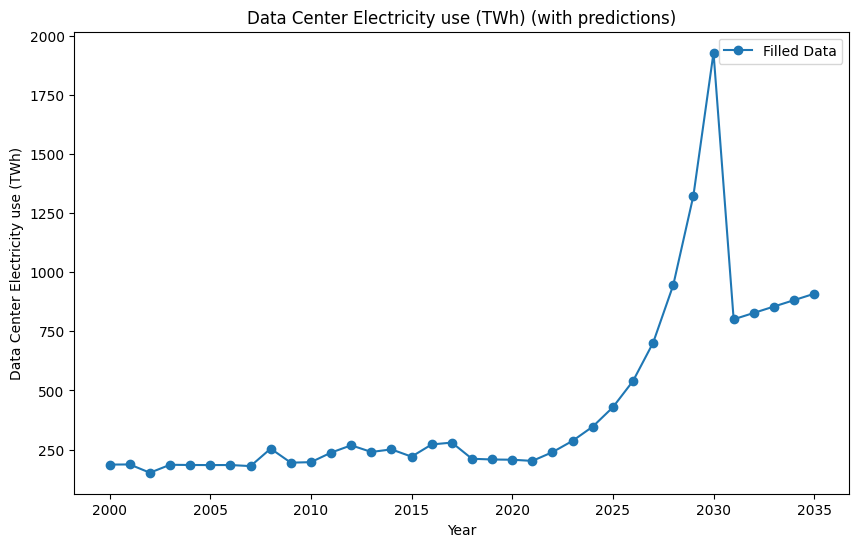


Filled DataFrame:
    Year  Data Center Electricity use (TWh)
0   2000                         186.455110
1   2001                         186.990924
2   2002                         152.000000
3   2003                         185.561585
4   2004                         184.733436
5   2005                         184.347874
6   2006                         184.598878
7   2007                         180.000000
8   2008                         254.000000
9   2009                         194.557379
10  2010                         196.697093
11  2011                         237.000000
12  2012                         268.000000
13  2013                         239.843959
14  2014                         250.761300
15  2015                         220.000000
16  2016                         271.635739
17  2017                         279.523457
18  2018                         211.000000
19  2019                         208.000000
20  2020                         207.000000
21  2021     

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
data = {
    "Year": np.arange(2000, 2036),
    "Data Center Electricity use (TWh)": [186.45511, 186.990924, 152, 185.561585, 184.733436, 184.347874, 184.598878, 180, 254, 194.557379, 
                                          196.697093, 237, 268, 239.843959, 250.7613, 220, 271.635739, 279.523457, 211, 208, 207, 202,
                                          239, 287, 347, 429, 540, 702, 946, 1324, 1929, np.nan, np.nan, np.nan, np.nan, np.nan]
}


# Create DataFrame
df = pd.DataFrame(data)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Data Center Electricity use (TWh)'], label='Original Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Data Center Electricity use (TWh)')
plt.title('Data Center Electricity use (TWh)')
plt.legend()
plt.show()

# Split the data into known and missing
known_data = df.dropna()
missing_data = df[df.isna().any(axis=1)]

# Prepare the feature matrix X and target vector y for training
X = known_data[['Year']]
y = known_data['Data Center Electricity use (TWh)']

# Train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    # Split the known data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    results[name] = mse

# Print MSE for each model
print("Mean Squared Error for each model:")
for name, mse in results.items():
    print(f"{name}: {mse}")

# Select the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Train the best model on the entire known dataset
best_model.fit(X, y)

# Predict the missing values
X_missing = missing_data[['Year']]
y_missing_pred = best_model.predict(X_missing)

# Fill the missing values in the original dataframe
df.loc[df.isna().any(axis=1), 'Data Center Electricity use (TWh)'] = y_missing_pred

# Plot the filled data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Data Center Electricity use (TWh)'], label='Filled Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Data Center Electricity use (TWh)')
plt.title('Data Center Electricity use (TWh) (with predictions)')
plt.legend()
plt.show()

# Print the filled dataframe
print("\nFilled DataFrame:")
print(df)


# 6. Predict "Data Center carbon footprint"

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data provided
data = {
    "Year": np.arange(2000, 2031),
    "Global GHG Emission": [40.77, 40.61, 41.55, 43.61, 44.33, 44.95, 46.47, 46.78, 47.58, 47.49, 49.42, 50.94, 51.71, 51.46, 52.16, 52.56, 51.55, 52.25, 52.82, 53.46, 51.46, 53.45, 53.85, 60.3, 61.7, 63.1, 64.6, 66.2, 67.9, 69.7, 71.7],
    "Global Electricity": [13261, 13393, 13839, 14384, 15027, 15681, 16327, 17133, 17443, 17353, 18753, 19444, 19924, 20578, 20987, 21405, 22028, 22722, 23536, 23921, 23966, 25343, 25530, 29035, 30158, 31375, 32693, 34150, 35767, 37571, 39594],
    "Computations": [0.540284, 0.708017, 0.927822, 1.215866, 1.593334, 2.087987, 2.736206, 3.585667, 4.698844, 6.157608, 8.069249, 10.574362, 13.857192, 18.159183, 23.796735, 31.184475, 40.865752, 53.5526, 83, 102, 127, 155, 193, 244, 311, 404, 535, 733, 1039, 1531, 2347],
    "Global Data Centre IP Traffic": [0.126437, 0.160562, 0.203897, 0.258927, 0.328811, 0.417556, 0.530252, 0.673365, 0.855103, 1.085892, 1.403, 1.843, 2.662, 3.174, 3.905, 4.803, 5.907, 7.266, 9, 11, 13, 16, 20, 26, 33, 43, 57, 78, 110, 162, 249],
    "Data Center Electricity use (TWh)": [186.45511, 186.990924, 152, 185.561585, 184.733436, 184.347874, 184.598878, 180, 254, 194.557379, 196.697093, 237, 268, 239.843959, 250.7613, 220, 271.635739, 279.523457, 211, 208, 207, 202, 239, 287, 347, 429, 540, 702, 946, 1324, 1929],
    "Data Center Carbon Footprint": [np.nan, np.nan, 76, np.nan, np.nan, np.nan, np.nan, 116.2, np.nan, np.nan, np.nan, 160, np.nan, np.nan, np.nan, 165, np.nan, np.nan, 129, np.nan, 125, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
}

# Create DataFrame
df = pd.DataFrame(data)

# Prepare the feature matrix X and target vector y
X = df[["Global GHG Emission", "Global Electricity", "Computations", "Global Data Centre IP Traffic", "Data Center Electricity use (TWh)"]]
y = df["Data Center Carbon Footprint"]

# Handle missing values in y by dropping those rows
df = df.dropna(subset=["Data Center Carbon Footprint"])
X = df[["Global GHG Emission", "Global Electricity", "Computations", "Global Data Centre IP Traffic", "Data Center Electricity use (TWh)"]]
y = df["Data Center Carbon Footprint"]

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regressor
model = Lasso()
model.fit(X, y)

# Predict on the test set
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Predict missing values
df_full = pd.DataFrame(data)
nan_emission_df = df_full[df_full["Data Center Carbon Footprint"].isna()]

X_nan = nan_emission_df[["Global GHG Emission", "Global Electricity", "Computations", "Global Data Centre IP Traffic", "Data Center Electricity use (TWh)"]]
y_nan_pred = model.predict(X_nan)

print("Predicted missing values:", y_nan_pred)

# Update DataFrame with predictions
#df_full.loc[df_full["Data Center Carbon Footprint"].isna(), "Data Center Carbon Footprint"] = y_nan_pred
#print(df_full)


Mean Squared Error: 38.91044473690265
R^2 Score: 0.9554845677235821
Predicted missing values: [ 95.96652854  97.07578372 102.15548947 105.49508518 109.14238704
 113.08880018 163.97853203 124.56761895 133.94153211 185.17711364
 169.28676628 176.50638044 189.10739637 192.95219423 131.8647754
 113.03847307 121.29929784 152.17547227 168.27362613 187.90593969
 210.11129946 236.4789714  268.77509925 306.99639297 350.87974064]


### further prediction

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   31
Model:                    AutoReg(11)   Log Likelihood                 -84.003
Method:               Conditional MLE   S.D. of innovations             16.138
Date:                Fri, 26 Jul 2024   AIC                            194.006
Time:                        10:57:23   BIC                            206.950
Sample:                            11   HQIC                           196.533
                                   31                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1972     35.413     -0.062      0.951     -71.605      67.211
y.L1           1.3367      0.200      6.700      0.000       0.946       1.728
y.L2          -0.3665      0.276     -1.328      0.1

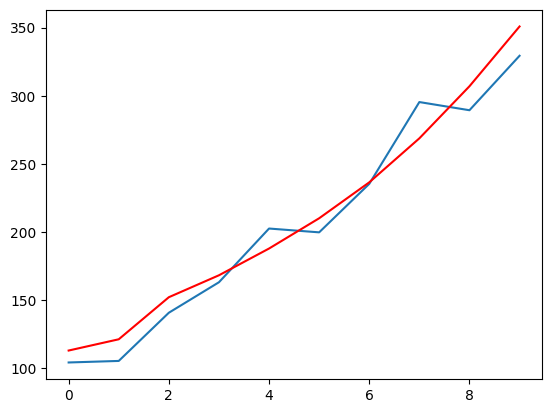

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "Year": np.arange(2000, 2031),
    "Data Center Carbon Footprint": [95.966529, 97.075784, 76, 102.155489, 105.495085, 109.142387, 113.0888, 116.2, 
                                     163.978532, 124.567619, 133.941532, 160, 185.177114, 169.286766, 176.50638, 165, 
                                     189.107396, 192.952194, 129, 131.864775, 125, 113.038473, 121.299298, 152.175472, 
                                     168.273626, 187.90594, 210.111299, 236.478971, 268.775099, 306.996393, 350.879741]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Year", inplace=True)
X=df.values

from statsmodels.tsa.ar_model import AutoReg

train = X[:len(X)-10]
test = X[len(X)-10:]

model = AutoReg(X,lags=11).fit()

print(model.summary())

pred = model.predict(start=len(train),end=len(X)-1,dynamic=False)

from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color= 'red')
print(pred)


In [5]:
pred_future = model.predict(start=len(X), end=len(X)+4, dynamic=False)
print("The future prediction for the next 10 years")
print(pred_future)
print('Number of predictions made: \t', len(pred_future))

The future prediction for the next 10 years
[379.53930389 392.02549793 389.94952878 390.08024896 385.55295479]
Number of predictions made: 	 5


# Embodied and Usage Data center Carbon emission

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

# Load the data
data = pd.read_csv('DC_1.csv')

# Columns
embodied_col = 'Embodied carbon\nemission of Data center\n(Mt CO2e)'
use_stage_col = 'Use stage carbon\nemission of Data center\n(Mt CO2e)'
carbon_footprint_col = 'Data Center\nCarbon footprint\n(Mt CO2e)'

# Separate non-null and null values
data_non_null = data.dropna(subset=[embodied_col, use_stage_col])
data_null = data[data[embodied_col].isna() | data[use_stage_col].isna()]

# Define feature columns
feature_columns = ['Year', 'Data Center\nCarbon footprint\n(Mt CO2e)']

# Split data into X and y
X_train = data_non_null[feature_columns]
y_train_embodied = data_non_null[embodied_col]
y_train_use_stage = data_non_null[use_stage_col]
X_test = data_null[feature_columns]

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Check if there are missing values to predict
if not X_test.empty:
    X_test_scaled = scaler.transform(X_test)

    # Define a function to create a Keras model
    def create_model():
        model = Sequential()
        model.add(Dense(64, input_dim=len(feature_columns), activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        return model

    # Train models
    def train_models(X, y):
        # Train a Keras Regressor
        keras_model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
        keras_model.fit(X, y)

        # Train a RandomForest Regressor
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_model.fit(X, y)

        # Train a Linear Regression model
        lr_model = LinearRegression()
        lr_model.fit(X, y)

        return keras_model, rf_model, lr_model

    keras_embodied, rf_embodied, lr_embodied = train_models(X_train_scaled, y_train_embodied)
    keras_use_stage, rf_use_stage, lr_use_stage = train_models(X_train_scaled, y_train_use_stage)

    # Predict using the trained models
    def predict(models, X):
        keras_model, rf_model, lr_model = models
        keras_predictions = keras_model.predict(X)
        rf_predictions = rf_model.predict(X)
        lr_predictions = lr_model.predict(X)
        return (keras_predictions + rf_predictions + lr_predictions) / 3

    embodied_predictions = predict((keras_embodied, rf_embodied, lr_embodied), X_test_scaled)
    use_stage_predictions = predict((keras_use_stage, rf_use_stage, lr_use_stage), X_test_scaled)

    # Ensure the sum of predictions matches the 'Data Center Carbon footprint (Mt CO2e)'
    carbon_footprint_test = data_null[carbon_footprint_col].values
    total_predictions = embodied_predictions + use_stage_predictions

    scale_factor = carbon_footprint_test / total_predictions

    embodied_predictions *= scale_factor
    use_stage_predictions *= scale_factor

    # Fill the missing values in the original dataframe
    data.loc[data[embodied_col].isna(), embodied_col] = embodied_predictions
    data.loc[data[use_stage_col].isna(), use_stage_col] = use_stage_predictions

# Print the updated data
print(data)


C:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a la

    Year  Embodied carbon\nemission of Data center\n(Mt CO2e)  \
0   2000                                          24.392888     
1   2001                                          24.713461     
2   2002                                          28.000000     
3   2003                                          24.779155     
4   2004                                          25.135725     
5   2005                                          25.469949     
6   2006                                          25.772360     
7   2007                                          25.198004     
8   2008                                          17.011207     
9   2009                                          23.473164     
10  2010                                          23.536040     
11  2011                                          13.170000     
12  2012                                          17.266103     
13  2013                                          18.339356     
14  2014                 